# Practical: Atomic Simulation Environment
[Atomic Simulation Environment (ASE)](https://wiki.fysik.dtu.dk/ase/) is a set of tools and Python modules for setting up, manipulating, running, visualizing and analyzing atomistic simulations. The code is freely available under the GNU LGPL license. ASE is written in the Python programming language. Compared to pymatgen, ASE is more focused on the simulation of atomic structures.

## Atoms Object
Similar to the `Structure` in pymatgen, ASE has an `Atoms` object that represents a collection of atoms. The `Atoms` object can be created by specifying the atomic positions, atomic numbers, and cell parameters. The `Atoms` object has many useful methods for manipulating and analyzing atomic structures.

### Create a simple `Atoms` object
Let's create a simple `Atoms` object for a hydrogen molecule.

In [3]:
from ase.build import molecule

# Build H2 molecule
h2 = molecule('H2')
print("H2 molecule:", h2)

H2 molecule: Atoms(symbols='H2', pbc=False)


### Visualize the `Atoms` object
You can use `nglview` to visualize the `Atoms` object. You can install it by running the cell below.

In [ ]:
!pip install nglview==3.1.4

In [4]:
from ase.visualize import view

view(h2, viewer='ngl')

## Force Fields
ASE has built-in support for many force fields, including Lennard-Jones, and Morse. 
### Lenaard-Jones Potential
In this example, we will use the Lennard-Jones to simulate the interaction between argon atoms.

In [4]:
from ase.calculators.lj import LennardJones
from ase import Atoms
# Create Lennard-Jones calculator
lj_calculator = LennardJones(sigma=3.4, epsilon=120 * 8.617333262145e-5)

# Create a pair of argon atoms
argon = Atoms('Ar2', positions=[[0, 0, 0], [0, 0, 3.4]])

# Set the calculator for the argon atom
argon.calc = lj_calculator

# Calculate the potential energy
potential_energy = argon.get_potential_energy()
print("Potential energy of argon with Lennard-Jones potential:", potential_energy)

Potential energy of argon with Lennard-Jones potential: 5.66618107207376e-05


You can plot the potential energy curve by varying the distance between two argon atoms.

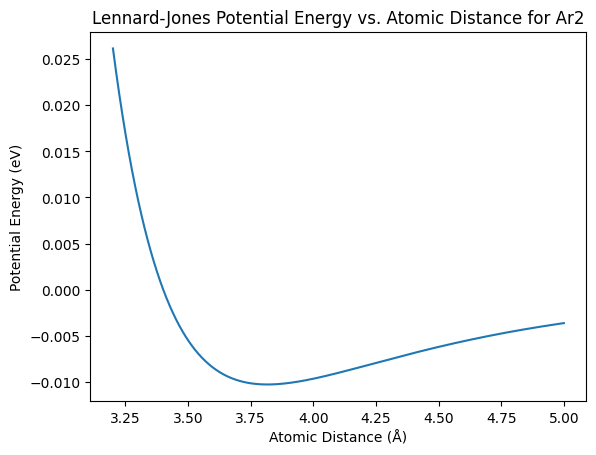

In [11]:
import numpy as np
import matplotlib.pyplot as plt
# Create a range of distances for argon atoms
argon_distances = np.linspace(3.2, 5.0, 1000)

# Calculate energies for each distance using Lennard-Jones potential
argon_energies = []
for d in argon_distances:
    argon = Atoms('Ar2', positions=[[0, 0, 0], [0, 0, d]])
    argon.calc = lj_calculator
    argon_energies.append(argon.get_potential_energy())

# Plot the results
plt.plot(argon_distances, argon_energies)
plt.xlabel('Atomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Lennard-Jones Potential Energy vs. Atomic Distance for Ar2')
plt.show()

### Morse Potential
In this example, we will use the Morse potential to simulate the interaction between hydrogen atoms.

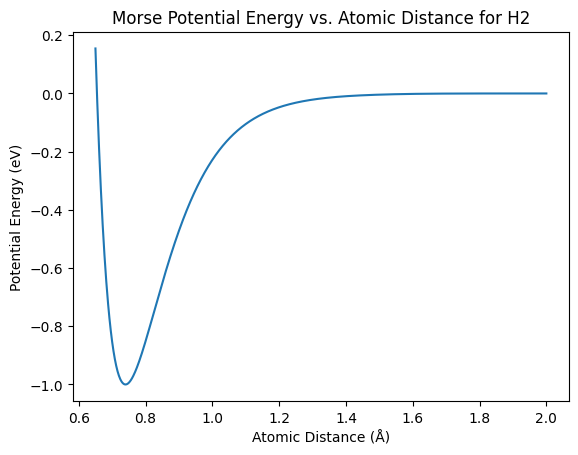

In [13]:
import numpy as np
from ase.calculators.morse import MorsePotential
from ase import Atoms
import matplotlib.pyplot as plt

# Create a range of distances
distances = np.linspace(0.65, 2, 1000)

# Initialize Morse potential calculator
morse_calculator = MorsePotential(D0=0.3429, alpha=1.02, r0=0.74)

# Calculate energies for each distance
energies = []
for d in distances:
    h2 = Atoms('H2', positions=[[0, 0, 0], [0, 0, d]])
    h2.calc = morse_calculator
    energies.append(h2.get_potential_energy())

# Plot the results
plt.plot(distances, energies)
plt.xlabel('Atomic Distance (Å)')
plt.ylabel('Potential Energy (eV)')
plt.title('Morse Potential Energy vs. Atomic Distance for H2')
plt.show()


### Vibrational Frequencies

The vibrational frequencies of a molecule can be calculated by diagonalizing the Hessian matrix, which is the second derivative of the potential energy with respect to atomic positions.

ASE can calculate the vibrational frequencies of a molecule using the finite difference method. In this example, we will calculate the vibrational frequencies of a water molecule using the Morse potential.

In [ ]:
from ase.vibrations import Vibrations
from ase.build import molecule

morse_calculator = MorsePotential(D0=5.15166, alpha=2.2, r0=0.957)
# Build H2O molecule
h2o = molecule('H2O')
h2o.calc = morse_calculator

# Perform vibrational analysis
vib = Vibrations(h2o)
vib.run()
vib.write_mode()
# Print vibrational frequencies
vib.summary()

# Clean up files generated during the vibrational analysis
vib.clean()



---------------------
  #    meV     cm^-1
---------------------
  0   61.0i    492.3i
  1    0.0       0.0
  2    0.0       0.0
  3    0.0       0.0
  4   62.8     506.8
  5   68.7     553.9
  6   73.3     591.0
  7  513.6    4142.9
  8  531.5    4286.6
---------------------
Zero-point energy: 0.625 eV


19

You can visualize the vibrational modes using `nglview`.

In [18]:
from ase.visualize import view
from ase.io import read
traj = read('vib.5.traj', index=':', format='traj')
view(traj, viewer='ngl')